In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam
from Bio.Seq import Seq

In [2]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/HG01106_cluster.json') 
T2T_dict = json.load(f) 

In [3]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[6].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[7].strip())

In [4]:
T2T_startStopDict

{'0': ['2854767', '3230115'],
 '1': ['3753716', '4006739'],
 '2': ['4871818', '5190102'],
 '3': ['5445042', '5660715'],
 '4': ['6286411', '6447818'],
 '5': ['6903666', '7334622'],
 '6': ['7672741', '7767570'],
 '7': ['7980090', '9171650'],
 '8': ['10582357', '10979803'],
 '9': ['11298323', '11512799'],
 '10': ['11938087', '12571660'],
 '11': ['13004212', '13940263'],
 '12': ['14432475', '15229625'],
 '13': ['15621424', '15780665'],
 '14': ['16272333', '16565214'],
 '15': ['16881985', '17137510'],
 '16': ['17814208', '18159024'],
 '17': ['18478533', '19053666'],
 '18': ['19626523', '19998113'],
 '19': ['20378979', '20563027'],
 '20': ['20915069', '21262610'],
 '21': ['22065492', '22473213'],
 '22': ['22771285', '23457613'],
 '23': ['23882736', '24271208'],
 '24': ['24529791', '25138416'],
 '25': ['25496252', '25599891'],
 '26': ['26127323', '26383934'],
 '27': ['26707341', '26989514'],
 '28': ['27695849', '28079393'],
 '29': ['28491291', '29332423'],
 '30': ['29950451', '30324454'],
 '3

In [5]:
samtools='temp'
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01106_finalized.txt') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        samtools=goodLine.split(" ")[5]
        myLines.append(goodLine)

100%|█████████████████████████████████| 32711/32711 [00:00<00:00, 415820.21it/s]


In [6]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [7]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[key]=str(477438)+"-"+str(int(T2T_startStopDict[key][0])-1)

        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[key]=str(int(T2T_startStopDict[str(int(key)-1)][1])+1)+"-"+str(int(T2T_startStopDict[key][0])-1)
            

100%|███████████████████████████████████████| 44/44 [00:00<00:00, 296226.93it/s]


In [8]:
NRB_Blocks.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43'])

In [9]:
import collections
templist = []

for key in list(NRB_Blocks.keys())[:-3]:
    templist.append([key, 'Spacer Block', (int(NRB_Blocks[key].split("-")[1])-int(NRB_Blocks[key].split("-")[0]))+1, int(NRB_Blocks[key].split("-")[0]), int(NRB_Blocks[key].split("-")[1])])
    templist.append([key, 'Repeat Block', (int(T2T_startStopDict[key][1])-int(T2T_startStopDict[str(key)][0]))+1, int(T2T_startStopDict[key][0]), int(T2T_startStopDict[key][1])])
    
tempDF = pd.DataFrame(data=templist, columns=['Block_Number','Block_Type','Length','Start','End'])
tempDF['SampleName']='HG01106'

In [10]:
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,2377329,477438,2854766,HG01106
1,0,Repeat Block,375349,2854767,3230115,HG01106
2,1,Spacer Block,523600,3230116,3753715,HG01106
3,1,Repeat Block,253024,3753716,4006739,HG01106
4,2,Spacer Block,865078,4006740,4871817,HG01106
...,...,...,...,...,...,...
77,38,Repeat Block,49544,37130390,37179933,HG01106
78,39,Spacer Block,340134,37179934,37520067,HG01106
79,39,Repeat Block,37846,37520068,37557913,HG01106
80,40,Spacer Block,188702,37557914,37746615,HG01106


In [11]:
#Pull the sequences for the spacer blocks (This is for RepeatMasker)
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/HG01106_spacerSequences_cleaned.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(">"+str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split("\n")[0]).split("0000976.")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split(str(tempDF.at[row,'End']))[1])
        else:
            continue

file.close()

In [12]:
#Pull the sequences for the spacer blocks
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/HG01106_spacerSequences.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])))
        else:
            continue

file.close()

## Load in HaeIII Restriction Data

In [2]:
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/HG01106_digestion.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/HG01106_digestion_cleaned.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                start=int(line.split("HG01106:")[1].split(",")[0].split("-")[0]) 
                cord1=int(line.split("base")[1].split(" ")[1])
                cord2=int(line.split("base")[2].split(" ")[1])
                file2.write(">HG01106:"+str(start+cord1)+"-"+str(start+cord2)+'\n')
            else:
                file2.write(line)
    file2.close()
file.close()


100%|██████████████████████████████| 366897/366897 [00:00<00:00, 1115275.75it/s]


In [11]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(samtools)+":"+str(NRB_Blocks[key])]=key
    #spacerDictionary["HC02666:"+str(NRB_Blocks[key])]=key
spacerDictionary

{'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:477438-2854766': '0',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:3230116-3753715': '1',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:4006740-4871817': '2',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:5190103-5445041': '3',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:5660716-6286410': '4',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:6447819-6903665': '5',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:7334623-7672740': '6',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:7767571-7980089': '7',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:9171651-10582356': '8',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:10979804-11298322': '9',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:11512800-11938086': '10',
 'chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:12571661-13004211': '11',
 'chrY.21-24.01.AMPL7-PAR2.FW.un

In [12]:
spacerDictionary2 = {}
for key in NRB_Blocks.keys():
    spacerDictionary2["HG01106:"+str(NRB_Blocks[key])]=key
spacerDictionary2

{'HG01106:477438-2854766': '0',
 'HG01106:3230116-3753715': '1',
 'HG01106:4006740-4871817': '2',
 'HG01106:5190103-5445041': '3',
 'HG01106:5660716-6286410': '4',
 'HG01106:6447819-6903665': '5',
 'HG01106:7334623-7672740': '6',
 'HG01106:7767571-7980089': '7',
 'HG01106:9171651-10582356': '8',
 'HG01106:10979804-11298322': '9',
 'HG01106:11512800-11938086': '10',
 'HG01106:12571661-13004211': '11',
 'HG01106:13940264-14432474': '12',
 'HG01106:15229626-15621423': '13',
 'HG01106:15780666-16272332': '14',
 'HG01106:16565215-16881984': '15',
 'HG01106:17137511-17814207': '16',
 'HG01106:18159025-18478532': '17',
 'HG01106:19053667-19626522': '18',
 'HG01106:19998114-20378978': '19',
 'HG01106:20563028-20915068': '20',
 'HG01106:21262611-22065491': '21',
 'HG01106:22473214-22771284': '22',
 'HG01106:23457614-23882735': '23',
 'HG01106:24271209-24529790': '24',
 'HG01106:25138417-25496251': '25',
 'HG01106:25599892-26127322': '26',
 'HG01106:26383935-26707340': '27',
 'HG01106:26989515-2

In [13]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/HG01106_Headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        SpacerBlocks[spacerDictionary[line.split(" ")[7].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
    f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():
    for item in SpacerBlocks[key]:
        SpacerBlockList.append([int(key), int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])

        tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 5872/5872 [00:00<00:00, 177927.87it/s]


In [14]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           0               0  180048    477439    657486
            537             0    1118    657487    658604
            535             0    1591    658605    660195
            544             0    1109    660196    661304
            529             0    2017    661305    663321
...                       ...     ...       ...       ...
40          5866           40    3482  37732408  37735889
            5862           40    3499  37735890  37739388
            5849           40    3544  37739389  37742932
            5850           40    3533  37742933  37746465
            5871           40     151  37746466  37746616

[5872 rows x 4 columns]

In [15]:
#desired_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01106_fragmentLengths.csv")

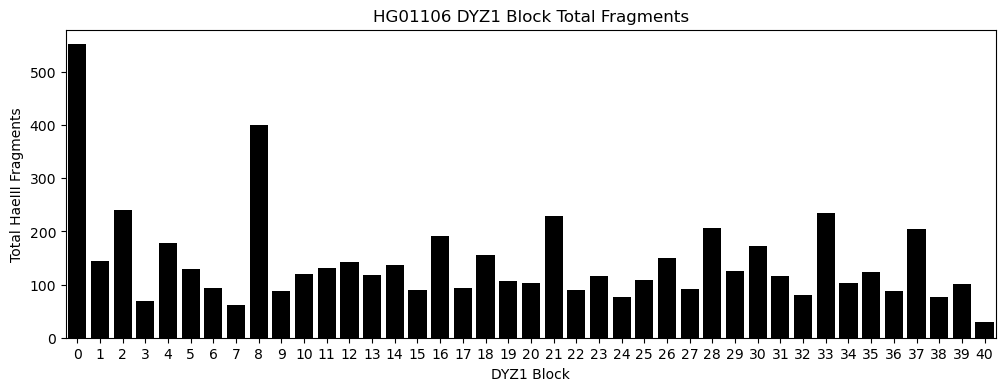

In [25]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,4
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 41:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==int(key)])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')
plt.title("HG01106 DYZ1 Block Total Fragments")
plt.xlabel("DYZ1 Block")
plt.ylabel("Total HaeIII Fragments")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01106_HaeIII_TotalFragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<41]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<41]['Length'])))

Mean: 3596.779121253406
Median: 3558.0


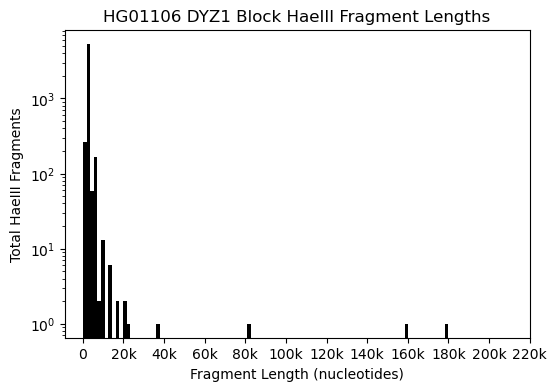

In [19]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
plt.hist(desired_df[desired_df['SpacerBlock']<41]['Length'], log=True, bins=100, color='black')
plt.title("HG01106 DYZ1 Block HaeIII Fragment Lengths")
plt.xlabel("Fragment Length (nucleotides)")
plt.ylabel("Total HaeIII Fragments")
x = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000]
labels = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k', '220k']
  
plt.xticks(x, labels, rotation ='horizontal')

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01106_HaeIII_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Import Repeatmasker and Visualize

In [19]:
desired_df['Coordinates']='temp'
for row in desired_df.index:
    desired_df.at[row,'Coordinates']='HG01106:'+str(desired_df.at[row,'Start'])+"-"+str(desired_df.at[row,'End'])

In [20]:
desired_df2 = desired_df.set_index("Coordinates").copy()
desired_df2

,SpacerBlock,Length,Start,End
Coordinates,,,,
HG01106:477439-657486,0,180048,477439,657486
HG01106:657487-658604,0,1118,657487,658604
HG01106:658605-660195,0,1591,658605,660195
HG01106:660196-661304,0,1109,660196,661304
HG01106:661305-663321,0,2017,661305,663321
...,...,...,...,...
HG01106:37732408-37735889,40,3482,37732408,37735889
HG01106:37735890-37739388,40,3499,37735890,37739388
HG01106:37739389-37742932,40,3544,37739389,37742932


In [21]:
sampleDict = {x:'+' for x in desired_df2.index}

In [22]:
spaceBlockDict = {x:{} for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/HG01106_digestion_cleaned.fasta.out') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        
        goodLine = ' '.join(line.split())
        if 'HSATII' in goodLine:
            #print(goodLine)
            sampleDict[str(goodLine.split(" ")[4])]=str(goodLine.split(" ")[8])
        else:
            continue
        
    f.close()

100%|█████████████████████████████████| 62103/62103 [00:00<00:00, 485941.73it/s]


In [23]:
sampleDict

{'HG01106:477439-657486': 'C',
 'HG01106:657487-658604': 'C',
 'HG01106:658605-660195': 'C',
 'HG01106:660196-661304': 'C',
 'HG01106:661305-663321': 'C',
 'HG01106:663322-666447': 'C',
 'HG01106:666448-667561': 'C',
 'HG01106:667562-669578': 'C',
 'HG01106:669579-670692': 'C',
 'HG01106:670693-672714': 'C',
 'HG01106:672715-675835': 'C',
 'HG01106:675836-676949': 'C',
 'HG01106:676950-678966': 'C',
 'HG01106:678967-685203': 'C',
 'HG01106:685204-686317': 'C',
 'HG01106:686318-688334': 'C',
 'HG01106:688335-689448': 'C',
 'HG01106:689449-690679': 'C',
 'HG01106:690680-692701': 'C',
 'HG01106:692702-695822': 'C',
 'HG01106:695823-696936': 'C',
 'HG01106:696937-698943': 'C',
 'HG01106:698944-715580': 'C',
 'HG01106:715581-737384': 'C',
 'HG01106:737385-773751': 'C',
 'HG01106:773752-776858': 'C',
 'HG01106:776859-936606': 'C',
 'HG01106:936607-943512': 'C',
 'HG01106:943513-963513': 'C',
 'HG01106:963514-967041': 'C',
 'HG01106:967042-970585': 'C',
 'HG01106:970586-974159': 'C',
 'HG0110

In [24]:
desired_df2['Orientation']=[x for x in sampleDict.values()]
desired_df2

,SpacerBlock,Length,Start,End,Orientation
Coordinates,,,,,
HG01106:477439-657486,0,180048,477439,657486,C
HG01106:657487-658604,0,1118,657487,658604,C
HG01106:658605-660195,0,1591,658605,660195,C
HG01106:660196-661304,0,1109,660196,661304,C
HG01106:661305-663321,0,2017,661305,663321,C
...,...,...,...,...,...
HG01106:37732408-37735889,40,3482,37732408,37735889,C
HG01106:37735890-37739388,40,3499,37735890,37739388,C
HG01106:37739389-37742932,40,3544,37739389,37742932,C


In [25]:
#desired_df2 = desired_df[desired_df['SpacerBlock']<23].copy()
#desired_df2['Orientation']='temp'
desired_df2['Color']='black'

In [26]:
for row in desired_df2.index:
    if desired_df2.at[row,'Orientation'] == '+':
        desired_df2.at[row,'Color']='blue'
    elif desired_df2.at[row,'Orientation'] == 'C':
        desired_df2.at[row,'Color']='red'
    else:
        continue

In [27]:
desired_df2

,SpacerBlock,Length,Start,End,Orientation,Color
Coordinates,,,,,,
HG01106:477439-657486,0,180048,477439,657486,C,red
HG01106:657487-658604,0,1118,657487,658604,C,red
HG01106:658605-660195,0,1591,658605,660195,C,red
HG01106:660196-661304,0,1109,660196,661304,C,red
HG01106:661305-663321,0,2017,661305,663321,C,red
...,...,...,...,...,...,...
HG01106:37732408-37735889,40,3482,37732408,37735889,C,red
HG01106:37735890-37739388,40,3499,37735890,37739388,C,red
HG01106:37739389-37742932,40,3544,37739389,37742932,C,red


In [28]:
print(collections.Counter(desired_df2['Orientation']))
print(collections.Counter(desired_df2['Color']))

Counter({'C': 5782, '+': 90})
Counter({'red': 5782, 'blue': 90})


In [29]:
#####################################################################################

In [30]:
rb_df = desired_df2.copy()

# Clusters

In [31]:
import pysam
from Bio.Seq import Seq

In [32]:
def split(word):
    return [char for char in word]

tempList = {}

#All Rows
for row in rb_df.index:
    
#Comment this out for all fragments
#for row in rb_df[(rb_df['Color']!='')].index:
    
# 2nd Pass BlueRows
#for row in rb_df.loc[BlackRows].index:
    
    
    tempDict = {}
    
    sequence = (pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])))

    if rb_df.at[row,'Color'] == 'blue':
        
        
        mySeq1 = sequence.split("HG01106:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()
        seq = Seq(mySeq1)
        mySeq = split(seq.reverse_complement())
        
    else:
        #print(split(sequence.split("chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))))
        mySeq = (split(sequence.split("HG01106:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()))
    
    goodSeq = []
    for x in mySeq:
        if str(x) != '\n':
            goodSeq.append(str(x))
        else:
            continue

    
    i=0
    while i < len(goodSeq):
        
        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
            else:
                tempDict[str(''.join(goodSeq[i:i+5]))]=1

        i+=1
        
    tempList["HG01106:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])]=tempDict


In [33]:
allKeys = []
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in allKeys:
            continue
        else:
            allKeys.append(kmer)
            
kmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=[x for x in set(allKeys)]).fillna(0)
kmerDF

,AACAA,ATAGG,TAAAC,TCTAT,TTGCA,GTTCT,GCCTA,GATAT,CTGCG,CAGAA,...,TAGAT,ATCTC,TAACT,AAGGG,GAGAG,TTGAA,TGCCT,AGGAA,TATAT,TTGAC
HG01106:477439-657486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01106:657487-658604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01106:658605-660195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01106:660196-661304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01106:661305-663321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01106:37732408-37735889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01106:37735890-37739388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01106:37739389-37742932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01106:37742933-37746465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
for key in tqdm(tempList.keys()):
    for kmer in tempList[key]:
        kmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
kmerDF

100%|██████████████████████████████████████| 5872/5872 [00:13<00:00, 435.00it/s]


,AACAA,ATAGG,TAAAC,TCTAT,TTGCA,GTTCT,GCCTA,GATAT,CTGCG,CAGAA,...,TAGAT,ATCTC,TAACT,AAGGG,GAGAG,TTGAA,TGCCT,AGGAA,TATAT,TTGAC
HG01106:477439-657486,146,69,131,60,63,1,0,59,1,71,...,70,0,0,274,219,1689,1,831,0,62
HG01106:657487-658604,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,11,0,2,0,0
HG01106:658605-660195,1,1,1,0,1,0,0,1,0,0,...,1,0,0,1,6,12,0,13,0,0
HG01106:660196-661304,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,11,0,2,0,0
HG01106:661305-663321,2,2,1,0,1,0,0,1,0,0,...,1,0,0,2,5,18,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01106:37732408-37735889,1,4,1,1,0,2,0,1,0,2,...,2,0,0,8,1,25,0,35,0,3
HG01106:37735890-37739388,1,5,1,1,0,1,0,1,0,3,...,2,0,0,11,1,25,0,38,0,3
HG01106:37739389-37742932,1,3,1,1,0,2,0,3,0,1,...,3,0,0,8,1,25,0,34,0,4
HG01106:37742933-37746465,1,5,1,1,0,2,0,1,0,4,...,2,0,1,8,1,23,0,36,1,3


In [35]:
def prevalenceFilter(df):
    dfo = df.copy()
    dfo2 = dfo.div(dfo.sum(axis=1), axis=0).copy()            
    return(dfo2)

In [36]:
import composition_stats as cs

In [37]:
def clrTransformation(df):
    #CLR Transform the relative abundnace dataframe
    df2 = df.copy()

    for row in df.index:
        df2.loc[row] = cs.clr(np.array(df.loc[row].replace(0.0, 1e-10)))
    
    return(df2)

In [38]:
abundanceKmer = prevalenceFilter(kmerDF)
abundanceKmer

,AACAA,ATAGG,TAAAC,TCTAT,TTGCA,GTTCT,GCCTA,GATAT,CTGCG,CAGAA,...,TAGAT,ATCTC,TAACT,AAGGG,GAGAG,TTGAA,TGCCT,AGGAA,TATAT,TTGAC
HG01106:477439-657486,0.000811,0.000383,0.000728,0.000333,0.000350,0.000006,0.0,0.000328,0.000006,0.000394,...,0.000389,0.0,0.000000,0.001522,0.001216,0.009381,0.000006,0.004616,0.000000,0.000344
HG01106:657487-658604,0.000898,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.009874,0.000000,0.001795,0.000000,0.000000
HG01106:658605-660195,0.000630,0.000630,0.000630,0.000000,0.000630,0.000000,0.0,0.000630,0.000000,0.000000,...,0.000630,0.0,0.000000,0.000630,0.003781,0.007561,0.000000,0.008192,0.000000,0.000000
HG01106:660196-661304,0.000905,0.000000,0.000000,0.000000,0.000905,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000905,0.000000,0.009955,0.000000,0.001810,0.000000,0.000000
HG01106:661305-663321,0.000994,0.000994,0.000497,0.000000,0.000497,0.000000,0.0,0.000497,0.000000,0.000000,...,0.000497,0.0,0.000000,0.000994,0.002484,0.008942,0.000000,0.004968,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01106:37732408-37735889,0.000288,0.001150,0.000288,0.000288,0.000000,0.000575,0.0,0.000288,0.000000,0.000575,...,0.000575,0.0,0.000000,0.002300,0.000288,0.007188,0.000000,0.010063,0.000000,0.000863
HG01106:37735890-37739388,0.000286,0.001431,0.000286,0.000286,0.000000,0.000286,0.0,0.000286,0.000000,0.000858,...,0.000572,0.0,0.000000,0.003147,0.000286,0.007153,0.000000,0.010873,0.000000,0.000858
HG01106:37739389-37742932,0.000282,0.000847,0.000282,0.000282,0.000000,0.000565,0.0,0.000847,0.000000,0.000282,...,0.000847,0.0,0.000000,0.002260,0.000282,0.007062,0.000000,0.009605,0.000000,0.001130
HG01106:37742933-37746465,0.000283,0.001417,0.000283,0.000283,0.000000,0.000567,0.0,0.000283,0.000000,0.001133,...,0.000567,0.0,0.000283,0.002267,0.000283,0.006517,0.000000,0.010201,0.000283,0.000850


In [39]:
CLR_KMER = clrTransformation(abundanceKmer)

In [40]:
CLR_KMER.index.name ='SampleName'

In [41]:
for row in rb_df.index:
    if 'HG01106:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']) in CLR_KMER.index:
        CLR_KMER.at['HG01106:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']), 'Color'] = str(rb_df.at[row,'Color'])
CLR_KMER

,AACAA,ATAGG,TAAAC,TCTAT,TTGCA,GTTCT,GCCTA,GATAT,CTGCG,CAGAA,...,ATCTC,TAACT,AAGGG,GAGAG,TTGAA,TGCCT,AGGAA,TATAT,TTGAC,Color
SampleName,,,,,,,,,,,,,,,,,,,,,
HG01106:477439-657486,6.124316,5.374815,6.015906,5.235054,5.283844,1.140709,-9.784185,5.218246,1.140709,5.403389,...,-9.784185,-9.784185,6.753837,6.529781,8.572601,1.140709,7.863339,-9.784185,5.267843,red
HG01106:657487-658604,10.853984,-5.156155,-5.156155,-5.156155,-5.156155,-5.156155,-5.156155,-5.156155,-5.156155,-5.156155,...,-5.156155,-5.156155,-5.156155,-5.156155,13.251879,-5.156155,11.547131,-5.156155,-5.156155,red
HG01106:658605-660195,10.304819,10.304819,10.304819,-5.351432,10.304819,-5.351432,-5.351432,10.304819,-5.351432,-5.351432,...,-5.351432,-5.351432,10.304819,12.096578,12.789725,-5.351432,12.869768,-5.351432,-5.351432,red
HG01106:660196-661304,10.735732,-5.282518,-5.282518,-5.282518,10.735732,-5.282518,-5.282518,-5.282518,-5.282518,-5.282518,...,-5.282518,-5.282518,10.735732,-5.282518,13.133627,-5.282518,11.428879,-5.282518,-5.282518,red
HG01106:661305-663321,10.331925,10.331925,9.638778,-5.779692,9.638778,-5.779692,-5.779692,9.638778,-5.779692,-5.779692,...,-5.779692,-5.779692,10.331925,11.248215,12.529149,-5.779692,11.941363,-5.779692,-5.779692,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01106:37732408-37735889,7.670847,9.057142,7.670847,7.670847,-7.200791,8.363994,-7.200791,7.670847,-7.200791,8.363994,...,-7.200791,-7.200791,9.750289,7.670847,10.889723,-7.200791,11.226195,-7.200791,8.769460,red
HG01106:37735890-37739388,7.643878,9.253316,7.643878,7.643878,-7.222884,7.643878,-7.222884,7.643878,-7.222884,8.742491,...,-7.222884,-7.222884,10.041774,7.643878,10.862754,-7.222884,11.281465,-7.222884,8.742491,red
HG01106:37739389-37742932,7.525624,8.624237,7.525624,7.525624,-7.328345,8.218771,-7.328345,8.624237,-7.328345,7.525624,...,-7.328345,-7.328345,9.605066,7.525624,10.744500,-7.328345,11.051985,-7.328345,8.911919,red


In [42]:
set(CLR_KMER['Color'])

{'blue', 'red'}

In [43]:
##################### Bray-Curtis distance ##################

In [44]:
from scipy.spatial import distance

In [45]:
fragmentList = [x for x in kmerDF.index]
fragmentList

['HG01106:477439-657486',
 'HG01106:657487-658604',
 'HG01106:658605-660195',
 'HG01106:660196-661304',
 'HG01106:661305-663321',
 'HG01106:663322-666447',
 'HG01106:666448-667561',
 'HG01106:667562-669578',
 'HG01106:669579-670692',
 'HG01106:670693-672714',
 'HG01106:672715-675835',
 'HG01106:675836-676949',
 'HG01106:676950-678966',
 'HG01106:678967-685203',
 'HG01106:685204-686317',
 'HG01106:686318-688334',
 'HG01106:688335-689448',
 'HG01106:689449-690679',
 'HG01106:690680-692701',
 'HG01106:692702-695822',
 'HG01106:695823-696936',
 'HG01106:696937-698943',
 'HG01106:698944-715580',
 'HG01106:715581-737384',
 'HG01106:737385-773751',
 'HG01106:773752-776858',
 'HG01106:776859-936606',
 'HG01106:936607-943512',
 'HG01106:943513-963513',
 'HG01106:963514-967041',
 'HG01106:967042-970585',
 'HG01106:970586-974159',
 'HG01106:974160-977733',
 'HG01106:977734-981277',
 'HG01106:981278-984851',
 'HG01106:984852-988425',
 'HG01106:988426-991959',
 'HG01106:991960-995533',
 'HG01106:99

In [46]:
OrientationDict = {}
for row in rb_df.index:
    OrientationDict['HG01106:'+str(rb_df.at[row,'Start'])+'-'+str(rb_df.at[row,'End'])] = str(rb_df.at[row,'Orientation'])
OrientationDict

{'HG01106:477439-657486': 'C',
 'HG01106:657487-658604': 'C',
 'HG01106:658605-660195': 'C',
 'HG01106:660196-661304': 'C',
 'HG01106:661305-663321': 'C',
 'HG01106:663322-666447': 'C',
 'HG01106:666448-667561': 'C',
 'HG01106:667562-669578': 'C',
 'HG01106:669579-670692': 'C',
 'HG01106:670693-672714': 'C',
 'HG01106:672715-675835': 'C',
 'HG01106:675836-676949': 'C',
 'HG01106:676950-678966': 'C',
 'HG01106:678967-685203': 'C',
 'HG01106:685204-686317': 'C',
 'HG01106:686318-688334': 'C',
 'HG01106:688335-689448': 'C',
 'HG01106:689449-690679': 'C',
 'HG01106:690680-692701': 'C',
 'HG01106:692702-695822': 'C',
 'HG01106:695823-696936': 'C',
 'HG01106:696937-698943': 'C',
 'HG01106:698944-715580': 'C',
 'HG01106:715581-737384': 'C',
 'HG01106:737385-773751': 'C',
 'HG01106:773752-776858': 'C',
 'HG01106:776859-936606': 'C',
 'HG01106:936607-943512': 'C',
 'HG01106:943513-963513': 'C',
 'HG01106:963514-967041': 'C',
 'HG01106:967042-970585': 'C',
 'HG01106:970586-974159': 'C',
 'HG0110

In [47]:
#All Rows

def split(word):
    return [char for char in word]

tempList = {}

for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/centReferences/references/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/centReferences/references/'+name, 'r')
        Lines = file1.readlines()

        tempDict = {}


        for line in tqdm(Lines): 
            
            if '>' in line:
                continue
            else:
                
                if 'DYZ1_' in name:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq.reverse_complement())
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue

                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        
                else:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq)
                    print(mySeq)
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue
                            
                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        

       
        tempList[name.split(".")[0]]=tempDict
        
    
            
ConkmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=abundanceKmer.columns).fillna(0)
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in ConkmerDF.columns:
            ConkmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
        else:
            continue
        
ConkmerDF.fillna(0, inplace=True)
abundanceConsensus = prevalenceFilter(ConkmerDF)
abundanceConsensus

Yqhet_3k1bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 319.21it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 484.11it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 406.94it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 431.82it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 457.69it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 497.57it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 384.94it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 528.72it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 397.32it/s]


,AACAA,ATAGG,TAAAC,TCTAT,TTGCA,GTTCT,GCCTA,GATAT,CTGCG,CAGAA,...,TAGAT,ATCTC,TAACT,AAGGG,GAGAG,TTGAA,TGCCT,AGGAA,TATAT,TTGAC
Yqhet_3k1bp,0.000963,0.000642,0.000321,0.000000,0.000642,0.000000,0.0,0.000321,0.0,0.000000,...,0.000321,0.0,0.0,0.000321,0.001605,0.009310,0.0,0.004173,0.0,0.000000
DYZ18_Yq,0.001049,0.000350,0.000699,0.000350,0.000350,0.000000,0.0,0.000350,0.0,0.000350,...,0.000350,0.0,0.0,0.001049,0.001399,0.009091,0.0,0.004196,0.0,0.000350
DYZ1_Yq,0.000281,0.000561,0.000000,0.000281,0.000000,0.000561,0.0,0.000000,0.0,0.000281,...,0.000561,0.0,0.0,0.002244,0.000281,0.006171,0.0,0.009257,0.0,0.001122
Yqhet_2k7bp,0.001087,0.000000,0.000000,0.000362,0.000362,0.000000,0.0,0.000000,0.0,0.000725,...,0.001449,0.0,0.0,0.001812,0.002174,0.007609,0.0,0.005797,0.0,0.000725


In [48]:
ConkmerDF

,AACAA,ATAGG,TAAAC,TCTAT,TTGCA,GTTCT,GCCTA,GATAT,CTGCG,CAGAA,...,TAGAT,ATCTC,TAACT,AAGGG,GAGAG,TTGAA,TGCCT,AGGAA,TATAT,TTGAC
Yqhet_3k1bp,3,2,1,0,2,0,0,1,0,0,...,1,0,0,1,5,29,0,13,0,0
DYZ18_Yq,3,1,2,1,1,0,0,1,0,1,...,1,0,0,3,4,26,0,12,0,1
DYZ1_Yq,1,2,0,1,0,2,0,0,0,1,...,2,0,0,8,1,22,0,33,0,4
Yqhet_2k7bp,3,0,0,1,1,0,0,0,0,2,...,4,0,0,5,6,21,0,16,0,2


In [49]:
for column in abundanceConsensus.columns:
    if column in abundanceKmer.columns:
        continue
    else:
        print(column)

In [50]:
for con in tempList.keys():
    print(con)
    print(tempList[con].values())

Yqhet_3k1bp
dict_values([113, 118, 113, 123, 147, 142, 140, 147, 137, 10, 2, 1, 4, 3, 1, 4, 5, 5, 9, 21, 26, 27, 29, 18, 14, 12, 4, 1, 4, 3, 3, 111, 5, 1, 5, 7, 8, 8, 5, 5, 2, 4, 4, 9, 12, 20, 24, 18, 2, 1, 7, 6, 7, 5, 2, 13, 12, 2, 2, 2, 19, 18, 12, 8, 5, 6, 2, 11, 5, 11, 12, 9, 10, 10, 7, 7, 6, 4, 2, 2, 6, 10, 8, 7, 8, 9, 9, 5, 1, 1, 2, 2, 11, 10, 12, 11, 10, 2, 3, 4, 1, 1, 3, 3, 4, 3, 1, 12, 10, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 10, 9, 8, 7, 4, 2, 3, 4, 2, 2, 26, 7, 6, 3, 3, 5, 40, 19, 18, 20, 18, 11, 28, 25, 29, 21, 37, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 13, 7, 5, 18, 20, 22, 8, 2, 2, 3, 1, 1, 2, 1, 1, 7, 2, 1, 3, 4, 3, 3, 1, 1, 1, 1, 2, 2, 7, 7, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 5, 5, 12, 5, 5, 8, 5, 3, 3, 3, 2, 2, 1, 1, 1, 7, 9, 3, 3, 6, 2, 3, 1, 1, 6, 4, 2, 2, 2, 2, 3, 2, 2, 5, 4, 1, 2, 4, 3, 3, 2, 5, 1, 1, 3, 1, 4, 4, 2, 2, 1, 2, 4, 10, 1, 1, 1, 4, 4, 3, 9, 2, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 1, 4, 3, 3, 3, 4, 2, 1, 5, 1, 3, 1, 1, 5, 3, 1, 4, 5, 2, 1, 

In [51]:
ConkmerDF[[x for x in ConkmerDF.max().sort_values(ascending=False).index]]

,AATGG,ATGGA,GAATG,GGAAT,TGGAA,GTGGA,GAGTG,AGTGG,GGAGT,TGGAG,...,ACGCT,TTGCC,TTGCG,CGACA,AACCC,ACCCA,CCGCT,GACCG,TCCAC,ACGAC
Yqhet_3k1bp,147,137,140,142,147,123,118,113,113,111,...,0,0,0,0,0,0,0,0,0,0
DYZ18_Yq,133,126,126,131,136,114,112,105,109,106,...,0,0,0,0,0,0,0,0,0,0
DYZ1_Yq,252,248,247,244,237,8,13,8,14,14,...,0,0,0,0,0,0,0,0,0,0
Yqhet_2k7bp,183,180,179,173,176,30,31,27,29,33,...,0,0,0,0,0,0,0,0,0,0


In [52]:
abundanceConsensus

,AACAA,ATAGG,TAAAC,TCTAT,TTGCA,GTTCT,GCCTA,GATAT,CTGCG,CAGAA,...,TAGAT,ATCTC,TAACT,AAGGG,GAGAG,TTGAA,TGCCT,AGGAA,TATAT,TTGAC
Yqhet_3k1bp,0.000963,0.000642,0.000321,0.000000,0.000642,0.000000,0.0,0.000321,0.0,0.000000,...,0.000321,0.0,0.0,0.000321,0.001605,0.009310,0.0,0.004173,0.0,0.000000
DYZ18_Yq,0.001049,0.000350,0.000699,0.000350,0.000350,0.000000,0.0,0.000350,0.0,0.000350,...,0.000350,0.0,0.0,0.001049,0.001399,0.009091,0.0,0.004196,0.0,0.000350
DYZ1_Yq,0.000281,0.000561,0.000000,0.000281,0.000000,0.000561,0.0,0.000000,0.0,0.000281,...,0.000561,0.0,0.0,0.002244,0.000281,0.006171,0.0,0.009257,0.0,0.001122
Yqhet_2k7bp,0.001087,0.000000,0.000000,0.000362,0.000362,0.000000,0.0,0.000000,0.0,0.000725,...,0.001449,0.0,0.0,0.001812,0.002174,0.007609,0.0,0.005797,0.0,0.000725


In [53]:
#Compare to Consensus Sequence Code
fragmentList = [x for x in kmerDF.index]
myDict = {}
for x in fragmentList:
    myDict[x] = {}
    for y in abundanceConsensus.index:
        myDict[x][y] = 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceConsensus.loc[y])))
    

In [54]:
print(len(kmerDF))

5872


In [55]:
myDict
myGoodDict = myDict.copy()

In [56]:
myGoodDict

{'HG01106:477439-657486': {'Yqhet_3k1bp': 0.9064634494731857,
  'DYZ18_Yq': 0.9464734572263843,
  'DYZ1_Yq': 0.6109176896543569,
  'Yqhet_2k7bp': 0.673292824716921},
 'HG01106:657487-658604': {'Yqhet_3k1bp': 0.8135574952955382,
  'DYZ18_Yq': 0.7999152553012517,
  'DYZ1_Yq': 0.5154730939389285,
  'Yqhet_2k7bp': 0.5671733926573518},
 'HG01106:658605-660195': {'Yqhet_3k1bp': 0.8695012951337159,
  'DYZ18_Yq': 0.8288478062580142,
  'DYZ1_Yq': 0.628452954448442,
  'Yqhet_2k7bp': 0.6864366729678638},
 'HG01106:660196-661304': {'Yqhet_3k1bp': 0.8156911165503367,
  'DYZ18_Yq': 0.8016248457424928,
  'DYZ1_Yq': 0.5197908271087052,
  'Yqhet_2k7bp': 0.5712686077775592},
 'HG01106:661305-663321': {'Yqhet_3k1bp': 0.8878130035985995,
  'DYZ18_Yq': 0.8510260231571707,
  'DYZ1_Yq': 0.6401475960255534,
  'Yqhet_2k7bp': 0.6985572042592713},
 'HG01106:663322-666447': {'Yqhet_3k1bp': 0.974877095494821,
  'DYZ18_Yq': 0.9055594629585662,
  'DYZ1_Yq': 0.616697409597365,
  'Yqhet_2k7bp': 0.6741182259606904},
 '

In [58]:
#import json
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/HG01106_kmerDict.json', 'w') as fp:
#    json.dump(myGoodDict, fp)

In [59]:
#Compare Fragments to Fragments
CutoffDict = {'0.1':0, '0.15':0, '0.2':0, '0.25':0, '0.3':0, '0.35':0, '0.4':0, '0.45':0, '0.5':0, '0.55':0, '0.6':0,'0.65':0, '0.7':0, '0.75':0, '0.8':0, '0.85':0, '0.9':0, '0.95':0}

for i in CutoffDict.keys():
    
    myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

    for x in myDict.keys():

        currentLeader = float(i)
        currentName = 'Other'

        for consensus in myDict[x].keys():

            if float(myDict[x][consensus]) > currentLeader:
                currentLeader = float(myDict[x][consensus])
                currentName = consensus
            else:
                continue

        myCons[currentName].append(x)

    CutoffDict[str(i)] = len(myCons['Other'])
    

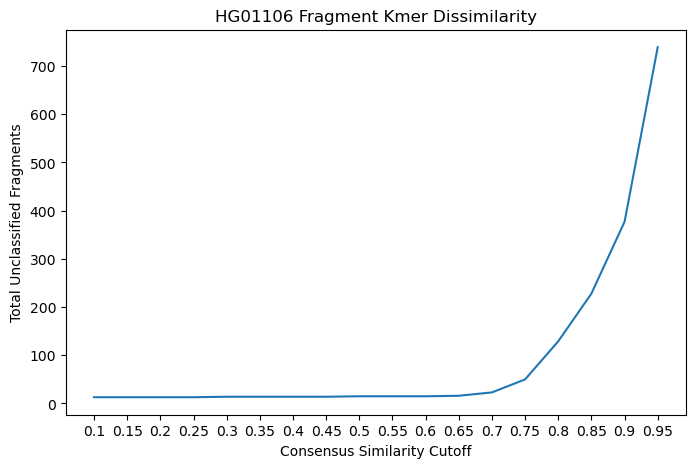

In [61]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,5
cutOffList = [[x,y] for x,y in CutoffDict.items()]
cutoffDF = pd.DataFrame(data=cutOffList, columns=['Similarity', 'Unknowns'])

sns.lineplot(data=cutoffDF, x='Similarity', y='Unknowns')

plt.title("HG01106 Fragment Kmer Dissimilarity")
plt.xlabel("Consensus Similarity Cutoff")
plt.ylabel("Total Unclassified Fragments")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01106_kmer_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [62]:
#Compare Fragments to Fragments

myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

for x in myDict.keys():
    
    
    currentLeader = 0.75
    currentName = 'Other'
    
    for consensus in myDict[x].keys():
    
        if float(myDict[x][consensus]) > currentLeader:
            currentLeader = float(myDict[x][consensus])
            currentName = consensus
        else:
            continue
            
    myCons[currentName].append(x)


for cons in myCons.keys():
    
    fragmentList = [x for x in myCons[cons]]

    Run = 0
    while len(fragmentList) > 0:

        currentTarget = fragmentList.pop(0)

        myDict = {}
        for x in fragmentList:
            myDict[x]= 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceKmer.loc[currentTarget])))

        tempList = []
        tempList.append(currentTarget)

        for x,y in myDict.items():
            if y > .75:
                tempList.append(x)
                fragmentList.remove(x)
            else:
                continue

        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01106/myConBins/'+str(cons)+"_"+str(Run)+'.fasta', 'a+') as file:
            for row in tempList:
                if OrientationDict[row] == 'C':
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+str(row.split("HG01106:")[1])))
                else:
                    file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+str(row.split("HG01106:")[1]))).split("\n")[0]+'\n')
                    string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+str(row.split("HG01106:")[1]))).split("\n")[1:]))
                    file.write(str(string.reverse_complement())+'\n')
        file.close()

        Run+=1
    

In [63]:
rb_df['Identity'] = 'temp'
for row in rb_df.index:
    rb_df.at[row,'Identity'] = 'HG01106:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End'])
rb_df.set_index("Identity", inplace=True)
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG01106:477439-657486,0,180048,477439,657486,C,red
HG01106:657487-658604,0,1118,657487,658604,C,red
HG01106:658605-660195,0,1591,658605,660195,C,red
HG01106:660196-661304,0,1109,660196,661304,C,red
HG01106:661305-663321,0,2017,661305,663321,C,red
...,...,...,...,...,...,...
HG01106:37732408-37735889,40,3482,37732408,37735889,C,red
HG01106:37735890-37739388,40,3499,37735890,37739388,C,red
HG01106:37739389-37742932,40,3544,37739389,37742932,C,red


In [64]:
rb_df['Color'] = 'temp'
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01106/myConBins/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01106/myConBins/'+name, 'r')
        Lines = file1.readlines()

        for line in tqdm(Lines): 
            if '>' in line:
                if 'Other' in name:
                    rb_df.at[str(line.split("0000976.")[1].strip()), 'Color'] = 'lime'
                elif 'DYZ1_Yq' in name:
                    rb_df.at[str(line.split("0000976.")[1].strip()), 'Color'] = 'black'
                    
                elif 'DYZ18_Yq' in name:
                    rb_df.at[str(line.split("0000976.")[1].strip()), 'Color'] = 'grey'
                    
                elif 'Yqhet_2k7bp' in name:
                    rb_df.at[str(line.split("0000976.")[1].strip()), 'Color'] = 'cyan'
                    
                elif 'Yqhet_3k1bp' in name:
                    rb_df.at[str(line.split("0000976.")[1].strip()), 'Color'] = 'red'
                    
                else:
                    print("IDK")
    
            else:
                continue

Other_4.fasta


100%|██████████████████████████████████████| 180/180 [00:00<00:00, 92760.13it/s]


Other_2.fasta


100%|█████████████████████████████████████| 250/250 [00:00<00:00, 437636.06it/s]


Other_0.fasta


100%|██████████████████████████████████████████| 8/8 [00:00<00:00, 70640.91it/s]


Other_1.fasta


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 63872.65it/s]


Other_8.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 59705.40it/s]


Other_3.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 11335.96it/s]


Yqhet_3k1bp_0.fasta


100%|███████████████████████████████████| 1754/1754 [00:00<00:00, 533102.12it/s]


DYZ18_Yq_0.fasta


100%|███████████████████████████████████| 3002/3002 [00:00<00:00, 700606.53it/s]


Other_6.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 24892.01it/s]


Yqhet_2k7bp_0.fasta


100%|███████████████████████████████████| 3163/3163 [00:00<00:00, 705481.71it/s]


Yqhet_3k1bp_1.fasta


100%|█████████████████████████████████████| 273/273 [00:00<00:00, 578890.29it/s]


DYZ1_Yq_0.fasta


100%|██████████████████████████████| 347473/347473 [00:00<00:00, 1237019.92it/s]


Other_7.fasta


100%|████████████████████████████████████████| 11/11 [00:00<00:00, 98373.87it/s]


DYZ1_Yq_1.fasta


100%|███████████████████████████████████████| 11/11 [00:00<00:00, 164189.84it/s]


Other_5.fasta


100%|███████████████████████████████████████| 14/14 [00:00<00:00, 134371.30it/s]


In [65]:
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG01106:477439-657486,0,180048,477439,657486,C,grey
HG01106:657487-658604,0,1118,657487,658604,C,red
HG01106:658605-660195,0,1591,658605,660195,C,red
HG01106:660196-661304,0,1109,660196,661304,C,red
HG01106:661305-663321,0,2017,661305,663321,C,red
...,...,...,...,...,...,...
HG01106:37732408-37735889,40,3482,37732408,37735889,C,black
HG01106:37735890-37739388,40,3499,37735890,37739388,C,black
HG01106:37739389-37742932,40,3544,37739389,37742932,C,black


In [66]:
for color in set(rb_df['Color']):
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/'+str(color)+".fasta", 'a+') as file:
        for row in rb_df[rb_df['Color']==color].index:
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976."+str(row)))
    file.close()
        

In [67]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/black.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/DYZ1.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000976.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|██████████████████████████████| 352341/352341 [00:00<00:00, 1085372.09it/s]


In [68]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/grey.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/DYZ18.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000976.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 3002/3002 [00:00<00:00, 517415.27it/s]


In [69]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/cyan.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/2kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000976.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 3163/3163 [00:00<00:00, 512223.30it/s]


In [70]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/red.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/3kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("0000976.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 2027/2027 [00:00<00:00, 595284.57it/s]


In [71]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/DYZ1_dataframe.csv")

In [37]:
rb_df = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/DYZ1_dataframe.csv").set_index("Identity")
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG01106:477439-657486,0,180048,477439,657486,C,grey
HG01106:657487-658604,0,1118,657487,658604,C,red
HG01106:658605-660195,0,1591,658605,660195,C,red
HG01106:660196-661304,0,1109,660196,661304,C,red
HG01106:661305-663321,0,2017,661305,663321,C,red
...,...,...,...,...,...,...
HG01106:37732408-37735889,40,3482,37732408,37735889,C,black
HG01106:37735890-37739388,40,3499,37735890,37739388,C,black
HG01106:37739389-37742932,40,3544,37739389,37742932,C,black


In [38]:
blockDefine = {x:{'Start':0, 'End':0} for x in set(rb_df['SpacerBlock'])}
for block in blockDefine.keys():
    blockDefine[block]['Start'] = int(rb_df[rb_df['SpacerBlock']==block].index[0].split("-")[0].split(":")[1])
    blockDefine[block]['End'] = int(rb_df[rb_df['SpacerBlock']==block].index[-1].split("-")[1])
blockDefine

{0: {'Start': 477439, 'End': 2854767},
 1: {'Start': 3230117, 'End': 3753716},
 2: {'Start': 4006741, 'End': 4871818},
 3: {'Start': 5190104, 'End': 5445042},
 4: {'Start': 5660717, 'End': 6286411},
 5: {'Start': 6447820, 'End': 6903666},
 6: {'Start': 7334624, 'End': 7672741},
 7: {'Start': 7767572, 'End': 7980090},
 8: {'Start': 9171652, 'End': 10582357},
 9: {'Start': 10979805, 'End': 11298323},
 10: {'Start': 11512801, 'End': 11938087},
 11: {'Start': 12571662, 'End': 13004212},
 12: {'Start': 13940265, 'End': 14432475},
 13: {'Start': 15229627, 'End': 15621424},
 14: {'Start': 15780667, 'End': 16272333},
 15: {'Start': 16565216, 'End': 16881985},
 16: {'Start': 17137512, 'End': 17814208},
 17: {'Start': 18159026, 'End': 18478533},
 18: {'Start': 19053668, 'End': 19626523},
 19: {'Start': 19998115, 'End': 20378979},
 20: {'Start': 20563029, 'End': 20915069},
 21: {'Start': 21262612, 'End': 22065492},
 22: {'Start': 22473215, 'End': 22771285},
 23: {'Start': 23457615, 'End': 2388273

In [35]:
goodColors = ['cyan', 'red', 'grey']
for block in set(rb_df['SpacerBlock']):
    if str(block) == '0':
        
        for color in set(rb_df['Color']):
            if color in goodColors:
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/'+str(color)+"_block.fasta", 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    if color == 'red':
                        End = str(828060)
                    else:
                        End =str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+Start+"-"+End))
                file.close()
                
            elif color == 'black':
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+Start+"-"+End))
                file.close()
                
            else:
                continue
    else:
        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
            Start= str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[0].split("-")[0].split(":")[1])
            End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly/FinalGenomes/HG01106.HIFIRW.ONTUL.na.chrY.fasta', "chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:"+Start+"-"+End))
        file.close()

In [36]:
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/"):
    for name in filenames:
        print(name)
        
        if 'HMMER' in name or 'cleaned' in name:
            continue
        else:
        
            file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/'+name, 'r')
            Lines = file1.readlines()

            with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/'+name.split(".")[0]+'_cleaned.fasta', 'a+') as file2:
                for line in tqdm(Lines):
                    if ">" in line:
                        print(line)
                        file2.write(">"+str(line.split("0000976.")[1]))
                    else:
                        file2.write(line)
            file2.close()


            file1.close()


red_block.fasta


100%|███████████████████████████████████| 2844/2844 [00:00<00:00, 592019.48it/s]


>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:657487-828060

grey_block.fasta


100%|███████████████████████████████████| 3002/3002 [00:00<00:00, 614719.55it/s]


>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:477439-657486

black_block.fasta


 18%|█████▊                          | 62241/343963 [00:00<00:00, 622370.53it/s]

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:963514-2854767

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:3230117-3753716

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:4006741-4871818

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:5190104-5445042

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:5660717-6286411

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:6447820-6903666

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:7334624-7672741

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:7767572-7980090

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:9171652-10582357

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:10979805-11298323

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:11512801-11938087

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:12571662-13004212

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:13940265-14432475

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-000

 49%|███████████████▎               | 169873/343963 [00:00<00:00, 889363.22it/s]

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:16565216-16881985

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:17137512-17814208

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:18159026-18478533



100%|██████████████████████████████| 343963/343963 [00:00<00:00, 1073319.61it/s]


>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:19053668-19626523

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:19998115-20378979

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:20563029-20915069

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:21262612-22065492

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:22473215-22771285

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:23457615-23882736

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:24271210-24529791

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:25138418-25496252

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:25599893-26127323

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:26383936-26707341

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:26989516-27695849

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:28079395-28491291

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:29332425-29950451

>chrY.21-24.01.AMPL7-PAR2

100%|███████████████████████████████████| 3112/3112 [00:00<00:00, 593519.19it/s]

>chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106:776859-963513

red_block_cleaned.fasta
black_block_cleaned.fasta
runHMMER2.sh
DYZ18_hmmer.tsv


FileNotFoundError: [Errno 2] No such file or directory: '/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/DYZ18_hmmer.tsv'

In [20]:
sizeDict = {'DYZ1_Yq': 3569, 'DYZ18_Yq': 2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp': 2767}

In [39]:
DYZ18Dict = {x:[] for x in set(rb_df[rb_df['Color']=='grey'].index)}
DYZ1Dict = {x:[] for x in set(rb_df[rb_df['Color']=='black'].index)}
k3bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='red'].index)}
k2bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='cyan'].index)}

In [40]:
DYZ18_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/HMMER/DYZ18_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/HMMER/DYZ18_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ18_hmmer2 = pd.DataFrame(data=DYZ18_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ18_hmmer = DYZ18_hmmer2[DYZ18_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ18_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
18,HG01106:477439-657486,4,2864,2,2852,C,0.0,2465.8,2850
38,HG01106:477439-657486,2,2864,2854,5696,C,0.0,2447.8,2842
57,HG01106:477439-657486,2,2864,5698,8544,C,0.0,2405.6,2846
49,HG01106:477439-657486,2,2864,8546,11392,C,0.0,2435.6,2846
0,HG01106:477439-657486,2,2864,11394,14256,C,0.0,2517.2,2862
...,...,...,...,...,...,...,...,...,...
24,HG01106:477439-657486,2,2864,166806,169692,C,0.0,2463.4,2886
8,HG01106:477439-657486,2,2864,169694,172565,C,0.0,2470.7,2871
26,HG01106:477439-657486,2,2864,172567,175438,C,0.0,2462.7,2871
34,HG01106:477439-657486,2,2864,175440,178341,C,0.0,2452.8,2901


In [41]:
DYZ1_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/HMMER/DYZ1_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/HMMER/DYZ1_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), 'C', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), '+', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ1_hmmer2 = pd.DataFrame(data=DYZ1_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ1_hmmer = DYZ1_hmmer2[DYZ1_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ1_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
4993,HG01106:963514-2854767,1,3569,1,3528,C,0.0,3045.2,3527
5747,HG01106:5190104-5445042,1,2229,478,2701,C,0.0,1892.3,2223
5614,HG01106:36836795-37130390,492,3569,639,3697,+,0.0,2696.2,3058
5844,HG01106:16565216-16881985,380,2114,895,2539,C,0.0,1340.9,1644
5845,HG01106:26383936-26707341,380,2114,895,2539,C,0.0,1340.9,1644
...,...,...,...,...,...,...,...,...,...
3160,HG01106:963514-2854767,1,3569,1873990,1877538,C,0.0,3110.2,3548
2938,HG01106:963514-2854767,1,3569,1877539,1881111,C,0.0,3113.3,3572
3288,HG01106:963514-2854767,1,3569,1881112,1884659,C,0.0,3108.2,3547
3774,HG01106:963514-2854767,1,3569,1884660,1888201,C,0.0,3099.2,3541


In [42]:
k3_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/HMMER/Yq_3kbp_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/HMMER/Yq_3kbp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k3_hmmer2 = pd.DataFrame(data=k3_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k3_hmmer = k3_hmmer2[k3_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k3_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
46,HG01106:657487-828060,1229,3119,1922,3796,C,0.0,1673.4,1874
2,HG01106:657487-828060,2,3119,3796,6927,C,0.0,2772.7,3131
9,HG01106:657487-828060,2,3119,6927,10053,C,0.0,2756.7,3126
1,HG01106:657487-828060,2,3119,10053,13184,C,0.0,2775.7,3131
4,HG01106:657487-828060,2,3119,13184,16320,C,0.0,2769.0,3136
6,HG01106:657487-828060,2,3119,16320,19441,C,0.0,2759.8,3121
3,HG01106:657487-828060,2,3119,19441,22572,C,0.0,2771.8,3131
11,HG01106:657487-828060,2,3119,22572,25683,C,0.0,2748.3,3111
8,HG01106:657487-828060,2,3119,25683,28809,C,0.0,2757.5,3126
0,HG01106:657487-828060,2,3119,28809,31940,C,0.0,2775.9,3131


In [43]:
k2_tempList = []

#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Con_Seqs/Color_Blocks/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:

    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            #Normally antisense
            if info[8] == '-':
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k2_hmmer2 = pd.DataFrame(data=k2_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k2_hmmer = k2_hmmer2[k2_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k2_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
49,HG01106:776859-963513,2,1312,51201,52501,C,0.0,1033.1,1300
48,HG01106:776859-963513,1271,2766,52490,53990,C,0.0,1317.1,1500
19,HG01106:776859-963513,2,2766,53990,56749,C,0.0,2481.8,2759
17,HG01106:776859-963513,2,2766,56749,59503,C,0.0,2485.2,2754
15,HG01106:776859-963513,2,2766,59503,62257,C,0.0,2487.1,2754
16,HG01106:776859-963513,2,2766,62257,65011,C,0.0,2487.1,2754
20,HG01106:776859-963513,2,2766,65011,67780,C,0.0,2480.9,2769
1,HG01106:776859-963513,2,2766,67780,70534,C,0.0,2506.1,2754
24,HG01106:776859-963513,2,2766,70534,73292,C,0.0,2472.4,2758
5,HG01106:776859-963513,2,2766,73292,76056,C,0.0,2503.4,2764


In [44]:
DYZ18_hmmer['Start']=0
DYZ1_hmmer['Start']=0
k3_hmmer['Start']=0
k2_hmmer['Start']=0

DYZ18_hmmer['End']=0
DYZ1_hmmer['End']=0
k3_hmmer['End']=0
k2_hmmer['End']=0

DYZ18_hmmer['Color']='grey'
DYZ1_hmmer['Color']='black'
k3_hmmer['Color']='red'
k2_hmmer['Color']='cyan'

DYZ18_hmmer['SpacerBlock']=0
DYZ1_hmmer['SpacerBlock']=0
k3_hmmer['SpacerBlock']=0
k2_hmmer['SpacerBlock']=0

In [45]:
for row in DYZ18_hmmer.index:
    DYZ18_hmmer.at[row,'Start'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fstart'])
    DYZ18_hmmer.at[row,'End'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fend'])
for row in DYZ1_hmmer.index:
    DYZ1_hmmer.at[row,'Start'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fstart'])
    DYZ1_hmmer.at[row,'End'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fend'])
for row in k3_hmmer.index:
    k3_hmmer.at[row,'Start'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fstart'])
    k3_hmmer.at[row,'End'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fend'])
for row in k2_hmmer.index:
    k2_hmmer.at[row,'Start'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fstart'])
    k2_hmmer.at[row,'End'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fend'])

In [46]:
LimeDF = rb_df[rb_df['Color']=="lime"].reset_index().rename(columns={'Identity':'Fragment'}).copy()

In [47]:
concattd = [DYZ18_hmmer, k3_hmmer,k2_hmmer,DYZ1_hmmer ]
newDF = pd.concat(concattd).drop(columns=['qstart', 'qend','fstart','fend','evalue','score'])
newDF.rename(columns={'orientation':"Orientation"}, inplace=True)
finalList = [newDF, LimeDF]
finalDF2 = pd.concat(finalList)
finalDF = finalDF2[finalDF2['Color']!='lime'].copy()
finalDF.sort_values(by='Start', ascending=True, inplace=True)

In [48]:
finalDF.reset_index(inplace=True)

In [49]:
for row in finalDF.index:
    for block in blockDefine.keys():
        if int(finalDF.at[row,'Start']) >= int(blockDefine[block]['Start']) and int(finalDF.at[row,'End']) <= int(blockDefine[block]['End']):
            finalDF.at[row,'SpacerBlock']= block
        else:
            continue

In [19]:
#for row in finalDF.index:
#    if str(finalDF.at[row,'Fragment']).strip() in list(rb_df.index):
#        finalDF.at[row,'SpacerBlock'] = rb_df.at[str(finalDF.at[row,'Fragment']),'SpacerBlock']
#    else:
#        continue
#finalDF

In [33]:
finalDF[finalDF['SpacerBlock']==0].iloc[[100]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
100,36,HG01106:657487-776858,C,2025,774834,776859,red,0


In [34]:
finalDF[finalDF['SpacerBlock']==0].iloc[[101]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
101,49,HG01106:776859-963513,C,1300,828060,829360,cyan,0


In [50]:
lapList = []
overlaps = []
for spacerblock in set(finalDF['SpacerBlock']):
    tempDF = finalDF[finalDF['SpacerBlock']==spacerblock].copy()
    i=0
    while i < len(tempDF.index):
        try:
            lapList.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
            if int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) < 0 or int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) > 40000:
                print(spacerblock)
                print(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print(i)
                overlaps.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print('\n')
            i+=1
        except:
            i+=1
            continue
#lapList

0
-11
116


0
-11
194


0
-14
197


0
-15
198


0
-15
199


0
-12
200


0
-12
201


0
-9
308


0
-9
326


0
-8
339


0
-18
359


0
-13
364


0
-33
377


0
-9
424


0
-8
443


0
-18
469


0
-13
473


0
-33
484


0
-2251
526


0
-19
670


1
-23
0


1
-23
2


1
-12
14


1
-25
74


1
-25
76


1
-25
114


1
-25
115


1
-25
120


2
-18
0


3
-19
33


4
-23
0


4
-18
29


4
-18
33


4
-25
114


4
-25
140


4
-25
142


5
-21
0


6
-31
0


6
-10
3


6
-15
90


7
-27
0


7
-25
17


7
-26
21


9
-18
0


9
-2
44


10
-17
0


10
-17
62


10
-25
95


11
-26
0


12
-17
0


13
-9
42


13
-9
46


13
-17
80


14
-27
0


14
-17
24


14
-15
27


14
-25
72


14
-25
80


14
-19
133


15
-32
0


15
-9
39


15
-12
55


16
-25
67


17
-8
36


17
-8
39


17
-9
48


18
-29
0


18
-15
50


18
-12
56


18
-25
75


19
-17
0


19
-25
35


19
-25
54


19
-25
56


19
-26
62


19
-25
64


19
-26
95


20
-29
0


20
-9
52


20
-13
66


21
-25
121


22
-21
31


22
-9
35


22
-9
42


23
-18
0


23
-16
32


23
-13
34


23
-

In [51]:
print(len(overlaps))

148


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([-2.2510e+03, -2.1385e+03, -2.0260e+03, -1.9135e+03, -1.8010e+03,
        -1.6885e+03, -1.5760e+03, -1.4635e+03, -1.3510e+03, -1.2385e+03,
        -1.1260e+03, -1.0135e+03, -9.0100e+02, -7.8850e+02, -6.7600e+02,
        -5.6350e+02, -4.5100e+02, -3.3850e+02, -2.2600e+02, -1.1350e+02,
        -1.0000e+00]),
 <BarContainer object of 20 artists>)

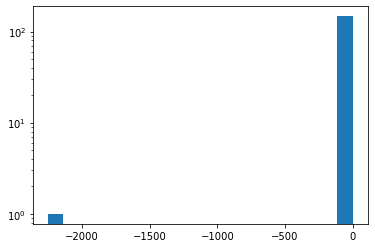

In [52]:
plt.hist(overlaps, log=True, bins=20)

3904
-2251


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.936e+03, 3.500e+01, 3.800e+01, 1.400e+01, 6.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-2251.  , -1943.25, -1635.5 , -1327.75, -1020.  ,  -712.25,
         -404.5 ,   -96.75,   211.  ,   518.75,   826.5 ,  1134.25,
         1442.  ,  1749.75,  2057.5 ,  2365.25,  2673.  ,  2980.75,
         3288.5 ,  3596.25,  3904.  ]),
 <BarContainer object of 20 artists>)

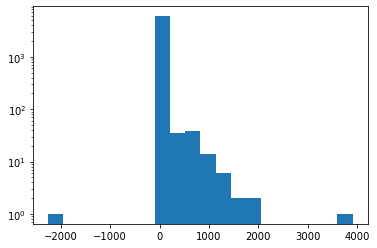

In [58]:
print(max(lapList))
print(min(lapList))

plt.hist(lapList, log=True, bins=20)

In [59]:
#rb_dfold = rb_df.copy()
rb_df = finalDF.copy()

In [22]:
rb_df[rb_df['Color']=='lime']

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
1094,0,HG01106:4804812-4804836,+,25,4804812,4804836,lime,2
1490,1,HG01106:6857944-6857968,+,25,6857944,6857968,lime,5
1585,2,HG01106:7618314-7618573,C,260,7618314,7618573,lime,6
1664,3,HG01106:9171652-9174559,C,2908,9171652,9174559,lime,8
2204,4,HG01106:11672080-11672109,+,30,11672080,11672109,lime,10
2281,5,HG01106:11934750-11935054,C,305,11934750,11935054,lime,10
2320,6,HG01106:12700989-12701278,C,290,12700989,12701278,lime,11
2322,7,HG01106:12704578-12704867,C,290,12704578,12704867,lime,11
2329,8,HG01106:12725962-12726251,C,290,12725962,12726251,lime,11
2484,9,HG01106:14204938-14205227,C,290,14204938,14205227,lime,12


# Export and update

In [112]:
rb_df[(rb_df['SpacerBlock']==0) & (rb_df['Color']=='black')]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
165,4841,HG01106:963514-967041,C,3527,963515,967042,black,0
166,4821,HG01106:967042-970585,C,3543,967043,970586,black,0
167,4103,HG01106:970586-974159,C,3573,970587,974160,black,0
168,3809,HG01106:974160-977733,C,3573,974161,977734,black,0
169,4617,HG01106:977734-981277,C,3543,977735,981278,black,0
...,...,...,...,...,...,...,...,...
709,3064,HG01106:2837503-2841051,C,3548,2837504,2841052,black,0
710,2848,HG01106:2841052-2844624,C,3572,2841053,2844625,black,0
711,3183,HG01106:2844625-2848172,C,3547,2844626,2848173,black,0
712,3664,HG01106:2848173-2851714,C,3541,2848174,2851715,black,0


In [124]:
tempDF.at[0,'Start']=963515
tempDF.at[0,'Length']= (2854766-963515)
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1891251,963515,2854766,HG01106
1,0,Repeat Block,375349,2854767,3230115,HG01106
2,1,Spacer Block,523600,3230116,3753715,HG01106
3,1,Repeat Block,253024,3753716,4006739,HG01106
4,2,Spacer Block,865078,4006740,4871817,HG01106
...,...,...,...,...,...,...
77,38,Repeat Block,49544,37130390,37179933,HG01106
78,39,Spacer Block,340134,37179934,37520067,HG01106
79,39,Repeat Block,37846,37520068,37557913,HG01106
80,40,Spacer Block,188702,37557914,37746615,HG01106


In [60]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01106/Finalized_Fragmentdf.csv")

In [126]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/BlockSize_dataframe.csv")

## Visualize

In [67]:
import turtle

In [69]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
#groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG01106 Yq Heterochromatin Spacer Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['SpacerBlock']))[24:]):
    
    totalAlus = len(rb_df[rb_df['SpacerBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        #turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        #turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Spacer Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['SpacerBlock']==key].copy() 
    for item in tempDF.index:
        
        if tempDF.at[item,'Orientation'] == 'C':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(.5)
        
        elif tempDF.at[item,'Orientation'] == '+':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)

        elif tempDF.at[item,'Orientation'] == 'temp':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)
        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 17/17 [04:04<00:00, 14.39s/it]


In [70]:
from PIL import Image

In [71]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [72]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_YqHeterochromatin_DYZ1_HMMER_part2_Finalized")

In [73]:
turtle.bye()